In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("boston_housing.csv")

In [3]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


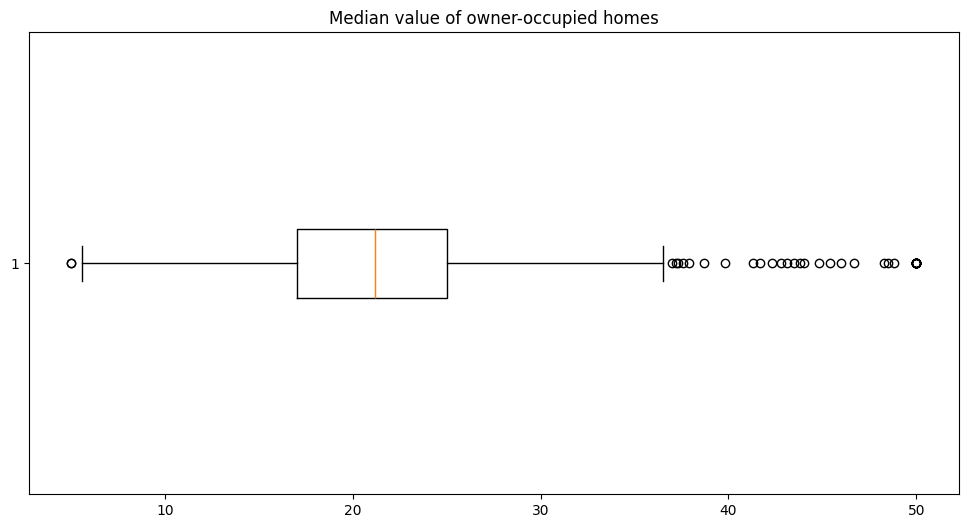

In [4]:
# For the "Median value of owner-occupied homes" provide a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df['MEDV'], vert=False)
plt.title("Median value of owner-occupied homes")
plt.show()

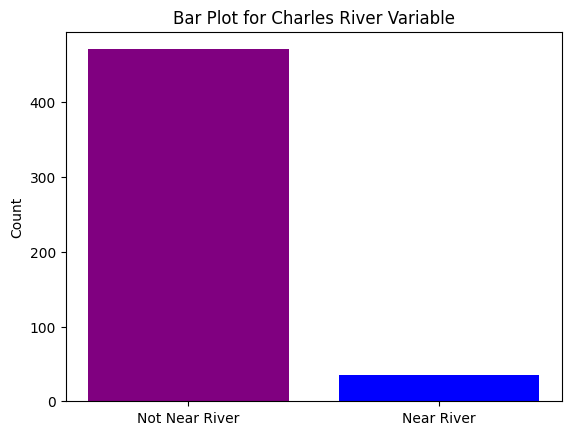

In [5]:
# Provide a bar plot for the Charles river variable
charles = df['CHAS'].value_counts()

plt.bar(charles.index, charles.values, color=['purple', 'blue'])
plt.title('Bar Plot for Charles River Variable')
plt.ylabel('Count')
plt.xticks(charles.index, labels=['Not Near River', 'Near River'])
plt.show()


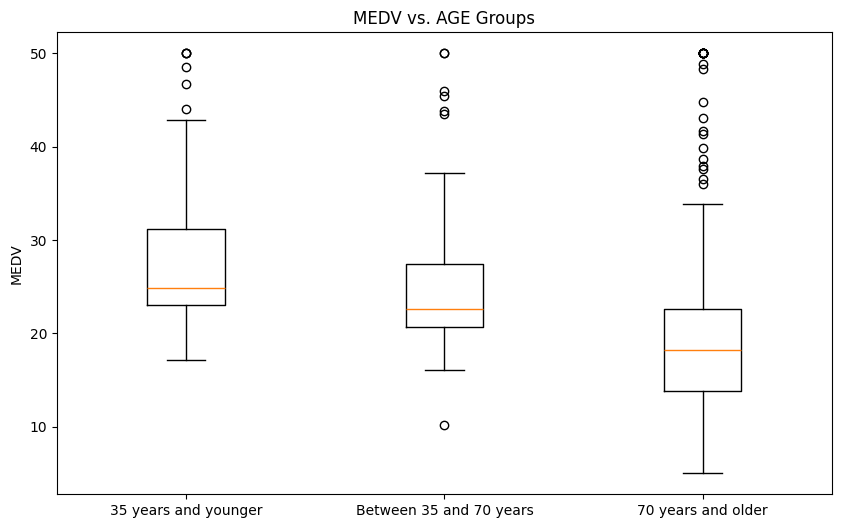

In [6]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
df['AGE_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
plt.boxplot([df[df['AGE_Group'] == label]['MEDV'] for label in labels], tick_labels=labels)
plt.title('MEDV vs. AGE Groups')
plt.ylabel('MEDV')
plt.show()


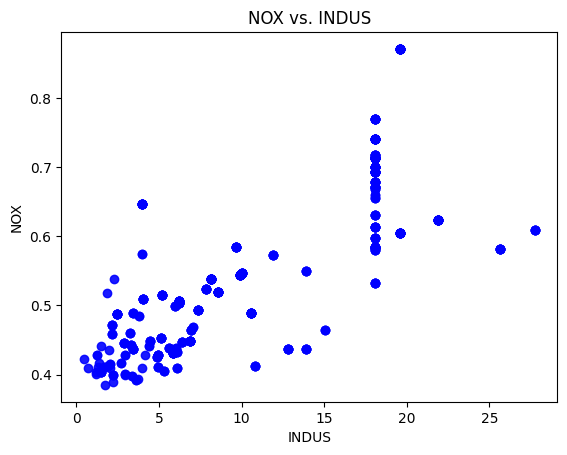

In [7]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of
# non-retail business acres per town. What can you say about the relationship?
plt.scatter(df['INDUS'], df['NOX'], color='blue', alpha=0.9)
plt.title('NOX vs. INDUS')
plt.xlabel('INDUS')
plt.ylabel('NOX')
plt.show()


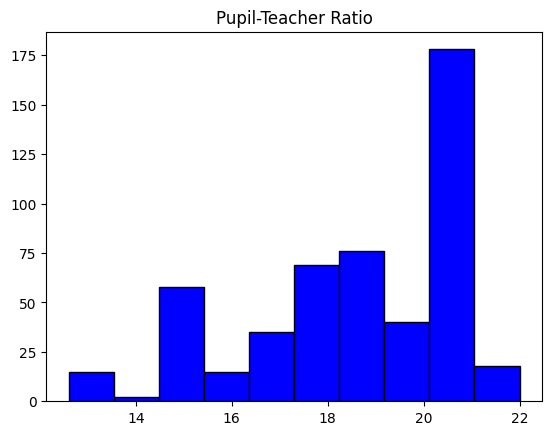

In [8]:
# Create a histogram for the pupil to teacher ratio variable
plt.hist(df['PTRATIO'], bins=10, color='blue', edgecolor='black')
plt.title('Pupil-Teacher Ratio')
plt.show()

In [9]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
bounded = df[df['CHAS'] == 1]['MEDV']
not_bounded = df[df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(bounded, not_bounded)

print('p-value:', p_value)
print('p-value is smaller than alpha value, so there is a significant difference.')



p-value: 7.390623170519905e-05
p-value is smaller than alpha value, so there is a significant difference.


In [10]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
f_stat, p_value = f_oneway(df[df['AGE_Group'] == '35 years and younger']['MEDV'],
                           df[df['AGE_Group'] == 'Between 35 and 70 years']['MEDV'],
                           df[df['AGE_Group'] == '70 years and older']['MEDV'])

print('p-value:', p_value)
print('p-value is smaller than alpha value, so there is a difference.')


p-value: 1.7105011022702984e-15
p-value is smaller than alpha value, so there is a difference.


In [11]:
# Can we conclude that there is no relationship between Nitric oxide concentrations
# and proportion of non-retail business acres per town? (Pearson Correlation)
correlation_coefficient, p_value = pearsonr(df['NOX'], df['INDUS'])
print('Pearson Correlation Coefficient:', correlation_coefficient)
print('p-value:', p_value)
print('Pearson Correlation Coefficient value (0.763651446920915) indicates a strong relationship. Also, p-value is so small. Therefore, there is a relationship.')



Pearson Correlation Coefficient: 0.763651446920915
p-value: 7.913361061241532e-98
Pearson Correlation Coefficient value (0.763651446920915) indicates a strong relationship. Also, p-value is so small. Therefore, there is a relationship.


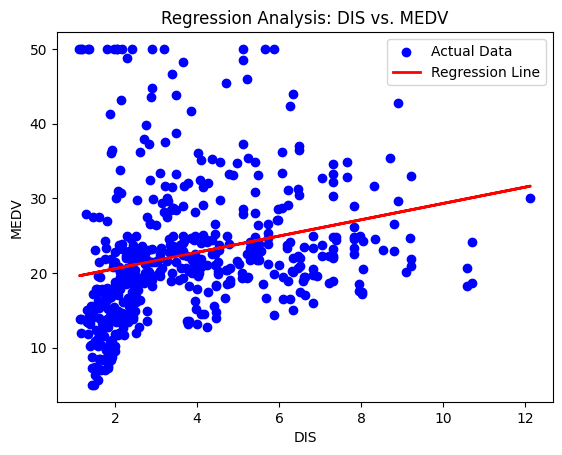

Pearson Correlation Coefficient: 0.24992873408590394
p-value: 1.2066117273371133e-08
p-value is smaller than alpha value and Pearson Correlation Coefficient is bigger than 0. Therefore, DIS has a positive impact on MEDV.


In [12]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
# (Regression analysis)
x = df[['DIS']]  
y = df['MEDV']

model = LinearRegression()
model.fit(x, y)

correlation_coefficient, p_value = pearsonr(df['DIS'], df['MEDV'])

plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression Line')
plt.title('Regression Analysis: DIS vs. MEDV')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.legend()
plt.show()

print('Pearson Correlation Coefficient:', correlation_coefficient)
print('p-value:', p_value)
print('p-value is smaller than alpha value and Pearson Correlation Coefficient is bigger than 0. Therefore, DIS has a positive impact on MEDV.')